In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

In [298]:
plt.rcParams['figure.figsize'] = (5.0, 7.0)

In [113]:
df_train = pd.read_csv('../All/train.csv')

In [116]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,Non-Vulnerable Households
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,Non-Vulnerable Households
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,Non-Vulnerable Households
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,Non-Vulnerable Households
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,Non-Vulnerable Households


In [115]:
df_train["Target"] = df_train["Target"].map({1: "Extreme Poverty",
                                       2: "Moderate Poverty",
                                       3: "Vulnerable Households",
                                       4: "Non-Vulnerable Households"})

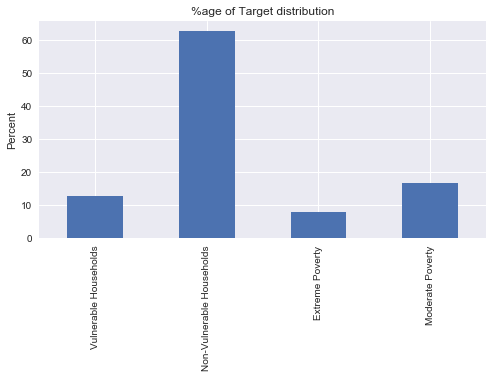

In [125]:
plt.figure(figsize=(8,4))
ax = (df_train['Target'].value_counts(normalize=True,sort=False)*100).plot.bar()
plt.title("%age of Target distribution")
ax.set(ylabel="Percent")
plt.show()

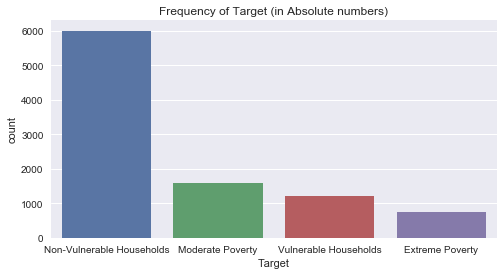

In [127]:
plt.figure(figsize=(8,4))
sns.countplot(x='Target',data=df_train)
plt.title("Frequency of Target (in Absolute numbers)")
plt.show()

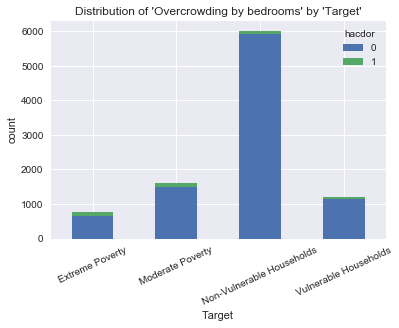

In [131]:
ct = pd.crosstab(df_train['Target'],df_train['hacdor'])
ct.plot.bar(stacked=True)
plt.title("Distribution of 'Overcrowding by bedrooms' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

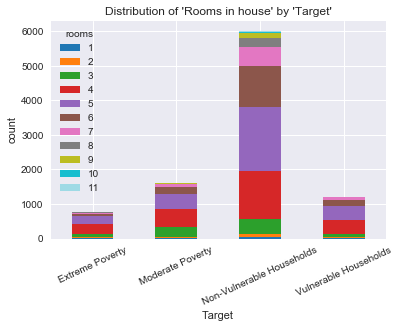

In [136]:
ct = pd.crosstab(df_train['Target'],df_train['rooms'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Rooms in house' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

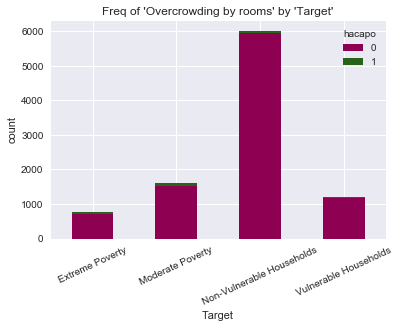

In [148]:
ct = pd.crosstab(df_train['Target'],df_train['hacapo'])
ct.plot.bar(stacked=True,colormap='PiYG')
plt.title("Freq of 'Overcrowding by rooms' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

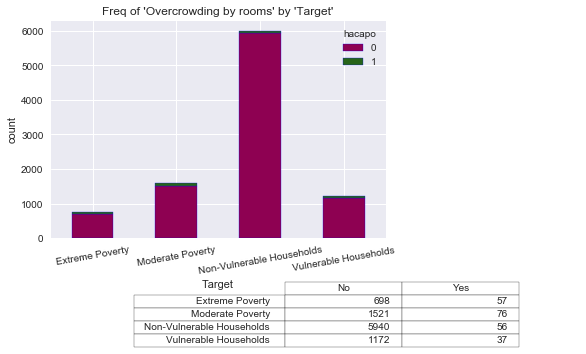

In [239]:
ct = pd.crosstab(df_train['Target'],df_train['hacapo'])
ex = pd.crosstab(df_train['Target'],df_train['hacapo'].map({0:"No",1:"Yes"}))

ct.plot.bar(stacked=True,colormap='PiYG',edgecolor='b')
plt.title("Freq of 'Overcrowding by rooms' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=10)



plt.table(cellText=ex.values,colWidths = [0.25]*len(ex.columns),
         rowLabels=ex.index,
         colLabels=ex.columns,
         cellLoc = 'bottom right', rowLoc = 'bottom right',
         loc='bottom',
         bbox=[0.7, -0.5, 0.7, 0.3])
plt.show()

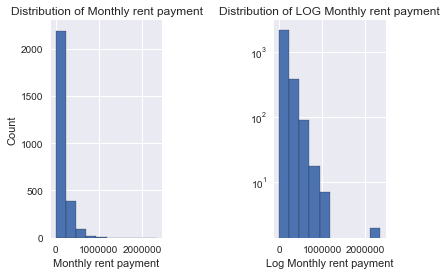

In [87]:
plt.subplot(1,2,1)
plt.hist(df_train.v2a1,range=(df_train.v2a1.min(),df_train.v2a1.max()),linewidth=0.2,edgecolor='black')
plt.title('Distribution of Monthly rent payment')
plt.xlabel('Monthly rent payment')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(df_train.v2a1,range=(df_train.v2a1.min(),df_train.v2a1.max()),linewidth=0.2,edgecolor='black',log=True)
plt.title('Distribution of LOG Monthly rent payment')
plt.xlabel('Log Monthly rent payment')
#plt.ylabel('Count')


plt.subplots_adjust(wspace=1)
plt.show()

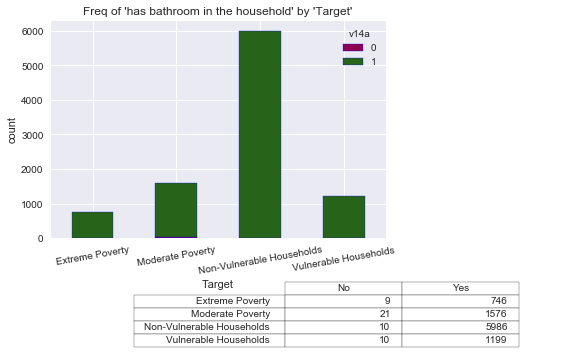

In [240]:
ct = pd.crosstab(df_train['Target'],df_train['v14a'])
ex = pd.crosstab(df_train['Target'],df_train['v14a'].map({0:"No",1:"Yes"}))

ct.plot.bar(stacked=True,colormap='PiYG',edgecolor='b')
plt.title("Freq of 'has bathroom in the household' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=10)



plt.table(cellText=ex.values,colWidths = [0.25]*len(ex.columns),
         rowLabels=ex.index,
         colLabels=ex.columns,
         cellLoc = 'bottom right', rowLoc = 'bottom right',
         loc='bottom',
         bbox=[0.7, -0.5, 0.7, 0.3])
plt.show()

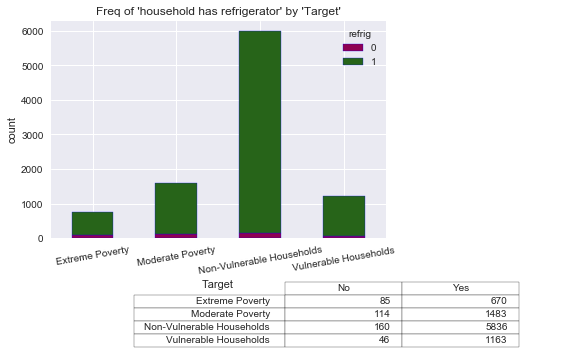

In [241]:
ct = pd.crosstab(df_train['Target'],df_train['refrig'])
ex = pd.crosstab(df_train['Target'],df_train['refrig'].map({0:"No",1:"Yes"}))

ct.plot.bar(stacked=True,colormap='PiYG',edgecolor='b')
plt.title("Freq of 'household has refrigerator' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=10)



plt.table(cellText=ex.values,colWidths = [0.25]*len(ex.columns),
         rowLabels=ex.index,
         colLabels=ex.columns,
         cellLoc = 'bottom right', rowLoc = 'bottom right',
         loc='bottom',
         bbox=[0.7, -0.5, 0.7, 0.3])
plt.show()

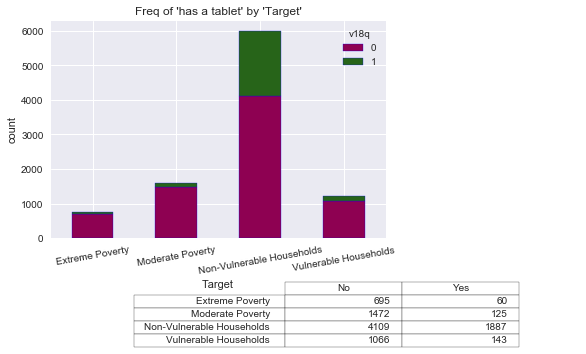

In [243]:
ct = pd.crosstab(df_train['Target'],df_train['v18q'])
ex = pd.crosstab(df_train['Target'],df_train['v18q'].map({0:"No",1:"Yes"}))

ct.plot.bar(stacked=True,colormap='PiYG',edgecolor='b')
plt.title("Freq of 'has a tablet' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=10)



plt.table(cellText=ex.values,colWidths = [0.25]*len(ex.columns),
         rowLabels=ex.index,
         colLabels=ex.columns,
         cellLoc = 'bottom right', rowLoc = 'bottom right',
         loc='bottom',
         bbox=[0.7, -0.5, 0.7, 0.3])
plt.show()

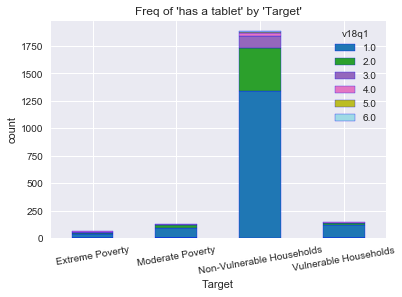

In [260]:
ct = pd.crosstab(df_train['Target'],df_train['v18q1'])
ex = pd.crosstab(df_train['Target'],df_train['v18q1'].map({0:"No",1:"Yes"}))

ct.plot.bar(stacked=True,colormap='tab20',edgecolor='b')
plt.title("Freq of 'has a tablet' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=10)



# plt.table(cellText=ex.values,colWidths = [0.25]*len(ex.columns),
#          rowLabels=ex.index,
#          colLabels=ex.columns,
#          cellLoc = 'bottom right', rowLoc = 'bottom right',
#          loc='bottom',
#          bbox=[0.7, -0.5, 0.7, 0.3])
plt.show()

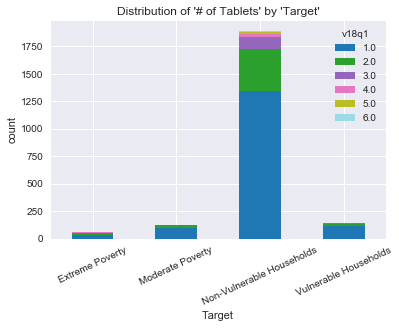

In [245]:
ct = pd.crosstab(df_train['Target'],df_train['v18q1'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of '# of Tablets' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

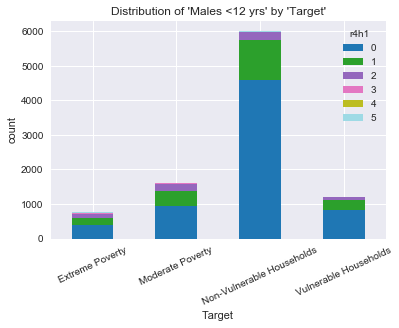

In [266]:
ct = pd.crosstab(df_train['Target'],df_train['r4h1'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Males <12 yrs' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

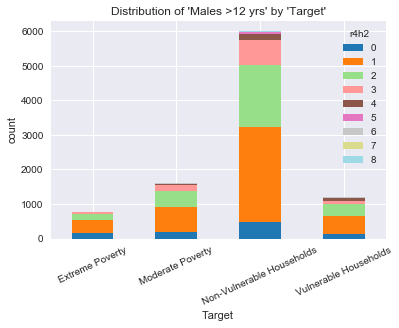

In [265]:
ct = pd.crosstab(df_train['Target'],df_train['r4h2'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Males >12 yrs' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

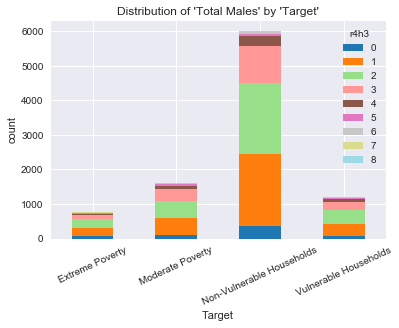

In [267]:
ct = pd.crosstab(df_train['Target'],df_train['r4h3'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Total Males' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

In [280]:
#df_train[['r4h2','r4h1']]
pd.crosstab(df_train['Target'],round(df_train['r4h2']/df_train['r4h3'],2))

col_0,0.0,0.17,0.2,0.25,0.29,0.33,0.4,0.5,0.6,0.67,0.75,0.8,0.83,1.0
Target,,,,,,,,,,,,,,
Extreme Poverty,105,0,0,5,13,46,0,121,24,46,13,0,0,321
Moderate Poverty,87,0,0,5,0,90,22,254,39,123,27,9,0,831
Non-Vulnerable Households,100,9,0,5,0,136,0,654,11,345,95,21,36,4213
Vulnerable Households,34,0,6,0,0,51,0,180,0,95,18,14,0,725


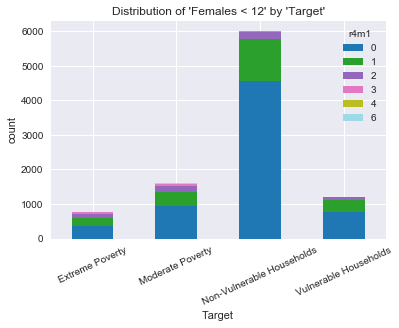

In [269]:
ct = pd.crosstab(df_train['Target'],df_train['r4m1'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Females < 12' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

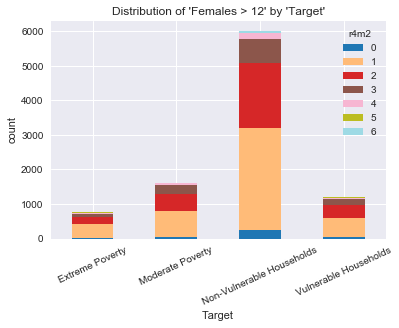

In [282]:
ct = pd.crosstab(df_train['Target'],df_train['r4m2'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Females > 12' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

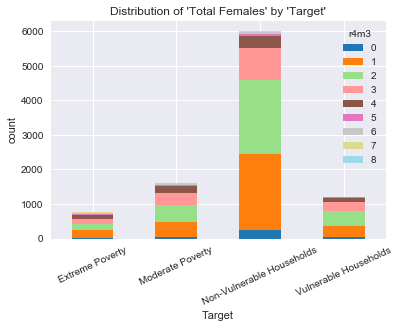

In [283]:
ct = pd.crosstab(df_train['Target'],df_train['r4m3'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Total Females' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

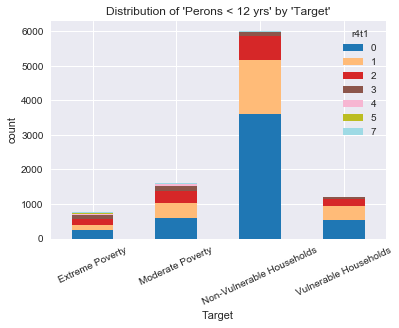

In [284]:
ct = pd.crosstab(df_train['Target'],df_train['r4t1'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Perons < 12 yrs' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

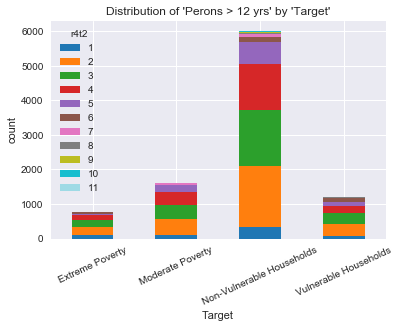

In [285]:
ct = pd.crosstab(df_train['Target'],df_train['r4t2'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Perons > 12 yrs' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

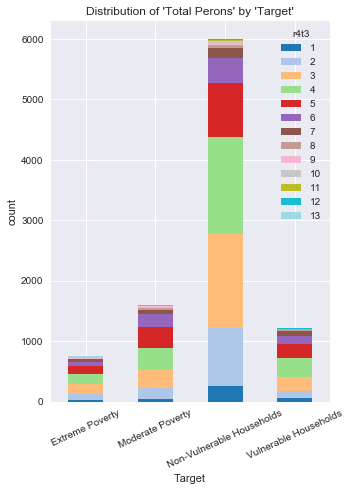

In [299]:
ct = pd.crosstab(df_train['Target'],df_train['r4t3'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Total Perons' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

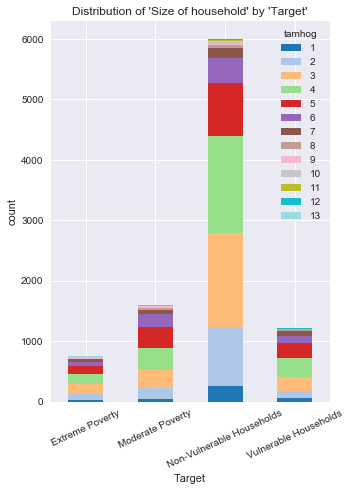

In [303]:
ct = pd.crosstab(df_train['Target'],df_train['tamhog'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Size of household' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

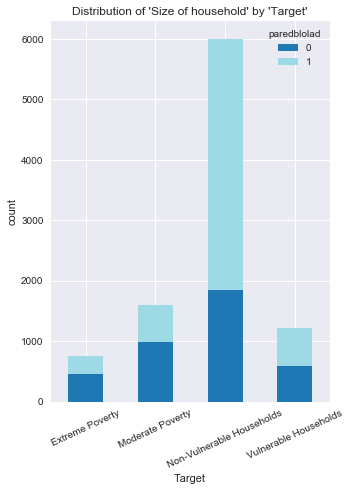

In [311]:
plt.figure(figsize=(8,4))
ct = pd.crosstab(df_train['Target'],df_train['paredblolad'])
ct.plot.bar(stacked=True,colormap='tab20')
plt.title("Distribution of 'Size of household' by 'Target'")
plt.ylabel('count')
plt.xticks(rotation=25)
plt.show()

In [330]:
# from sklearn.preprocessing import MinMaxScaler
# tr = MinMaxScaler()
# df_train_tr = tr.fit_transform(df_train.ix[:,1:-1].values)

df_train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [333]:
df_train.select_dtypes(include=["object"]).head()

,Id,idhogar,dependency,edjefe,edjefa,Target
0,ID_279628684,21eb7fcc1,no,10,no,Non-Vulnerable Households
1,ID_f29eb3ddd,0e5d7a658,8,12,no,Non-Vulnerable Households
2,ID_68de51c94,2c7317ea8,8,no,11,Non-Vulnerable Households
3,ID_d671db89c,2b58d945f,yes,11,no,Non-Vulnerable Households
4,ID_d56d6f5f5,2b58d945f,yes,11,no,Non-Vulnerable Households


In [339]:
df_train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [337]:
df_train[['Id','hogar_nin','hogar_adul','hogar_mayor','hogar_total','dependency']]

,Id,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency
0,ID_279628684,0,1,0,1,no
1,ID_f29eb3ddd,0,1,1,1,8
2,ID_68de51c94,0,1,1,1,8
3,ID_d671db89c,2,2,0,4,yes
4,ID_d56d6f5f5,2,2,0,4,yes
5,ID_ec05b1a7b,2,2,0,4,yes
6,ID_e9e0c1100,2,2,0,4,yes
7,ID_3e04e571e,2,2,0,4,yes
8,ID_1284f8aad,2,2,0,4,yes
9,ID_51f52fdd2,2,2,0,4,yes


In [315]:
pd.crosstab(df_train['Target'],df_train['pareddes'])

pareddes,0,1
Target,,
Extreme Poverty,743,12
Moderate Poverty,1555,42
Non-Vulnerable Households,5979,17
Vulnerable Households,1198,11


In [307]:
df_train['rez_esc'].describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64